Se cargan las librerías:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
np.random.seed(4711)

## Cuenta @MANCITY

Se carga en primer lugar la base de datos de la cuenta @mancity:

In [ ]:
df_mancity_def=pd.read_excel("df_mancity_def_sindup2_bool.xlsx")
df_mancity_def = df_mancity_def.drop('Unnamed: 0', axis=1)
df_mancity_def

,author_followers,music_preciseDuration.preciseDuration,stats_diggCount,stats_shareCount,stats_commentCount,stats_playCount,stats_collectCount,video_duration,video_bitrate,video_volumeInfo.Loudness,video_volumeInfo.Peak,dias_fecactual_fecpublic,tasa_compromiso,hashtagh_football,hashtagh_manchestercity,hashtagh_premierleague
0,24127659,39.680000,123600,710,686,1300000,4082,39,2590965,-12.3,1.00000,82,0.103395,SI,NO,NO
1,24126774,25.783000,37500,101,249,445400,1236,25,1685411,-14.5,0.92257,82,0.084980,SI,NO,NO
2,24126803,13.818750,47000,339,258,418600,2030,7,1768177,-15.8,0.48417,83,0.113705,SI,NO,SI
3,24129066,10.370563,123600,710,500,1300000,4082,10,2646531,-13.9,0.52481,83,0.120797,NO,SI,NO
4,24127632,31.033438,170600,795,793,1600000,4977,30,2088717,-29.3,0.11350,83,0.107618,SI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,24127159,11.964063,29200,175,192,265600,1036,11,3006064,-11.2,0.87096,233,0.111322,SI,SI,NO
313,24127415,17.607000,23200,88,128,223000,767,17,1564357,-33.8,0.06998,234,0.105004,SI,SI,NO
314,24128134,15.046500,25400,57,94,232500,821,15,1437657,-17.0,0.54954,234,0.109897,SI,SI,NO
315,24128892,24.686000,32300,210,188,300800,1611,24,733503,-20.5,0.66834,234,0.108703,NO,NO,NO


In [ ]:
cols_categoricas = ['hashtagh_football','hashtagh_manchestercity','hashtagh_premierleague']
df_mancity_def[cols_categoricas] = df_mancity_def[cols_categoricas].astype("category")

Se visualiza el comportamiento de las visualizaciones respecto a las variables numéricas:

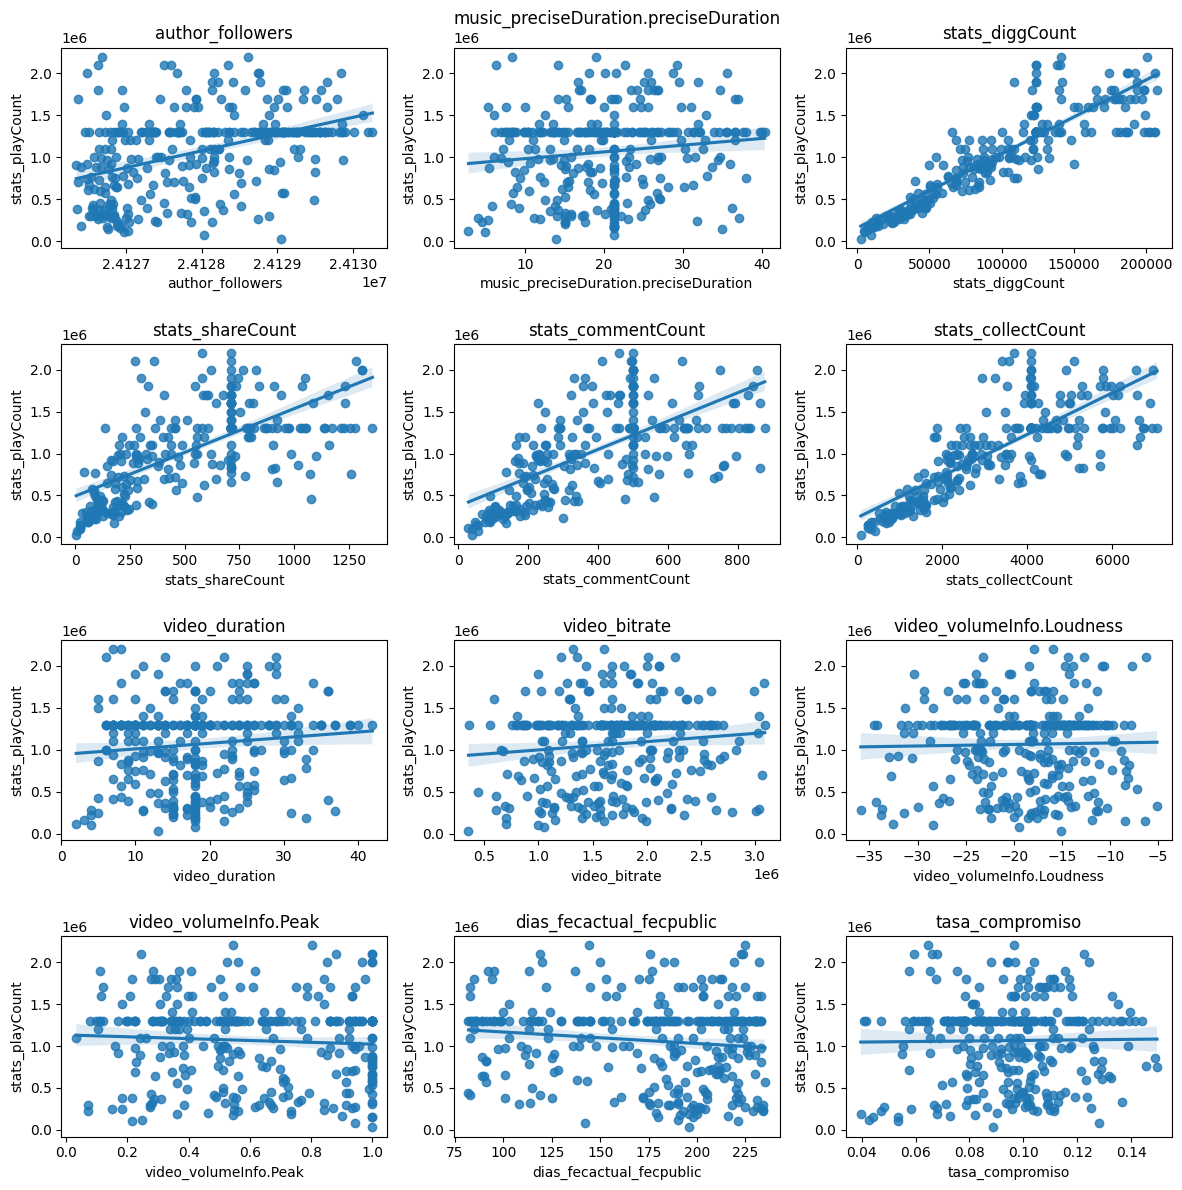

In [ ]:
#listado de variables numericas excepto stats_playCount
cols_numericas = (df_mancity_def
                  .drop(columns=["stats_playCount"])
                  .select_dtypes(include=np.number)
                  .columns.tolist())
cols_numericas

# son 15 variables numericas
# el plot seran 5 filas y 3 columnas

fig, axes = plt.subplots(4, 3, figsize=(12, 12))
axes = axes.flatten()
for i, col in enumerate(cols_numericas):
    sns.regplot(data=df_mancity_def,
                x=col, y="stats_playCount",
                ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


Correlación:

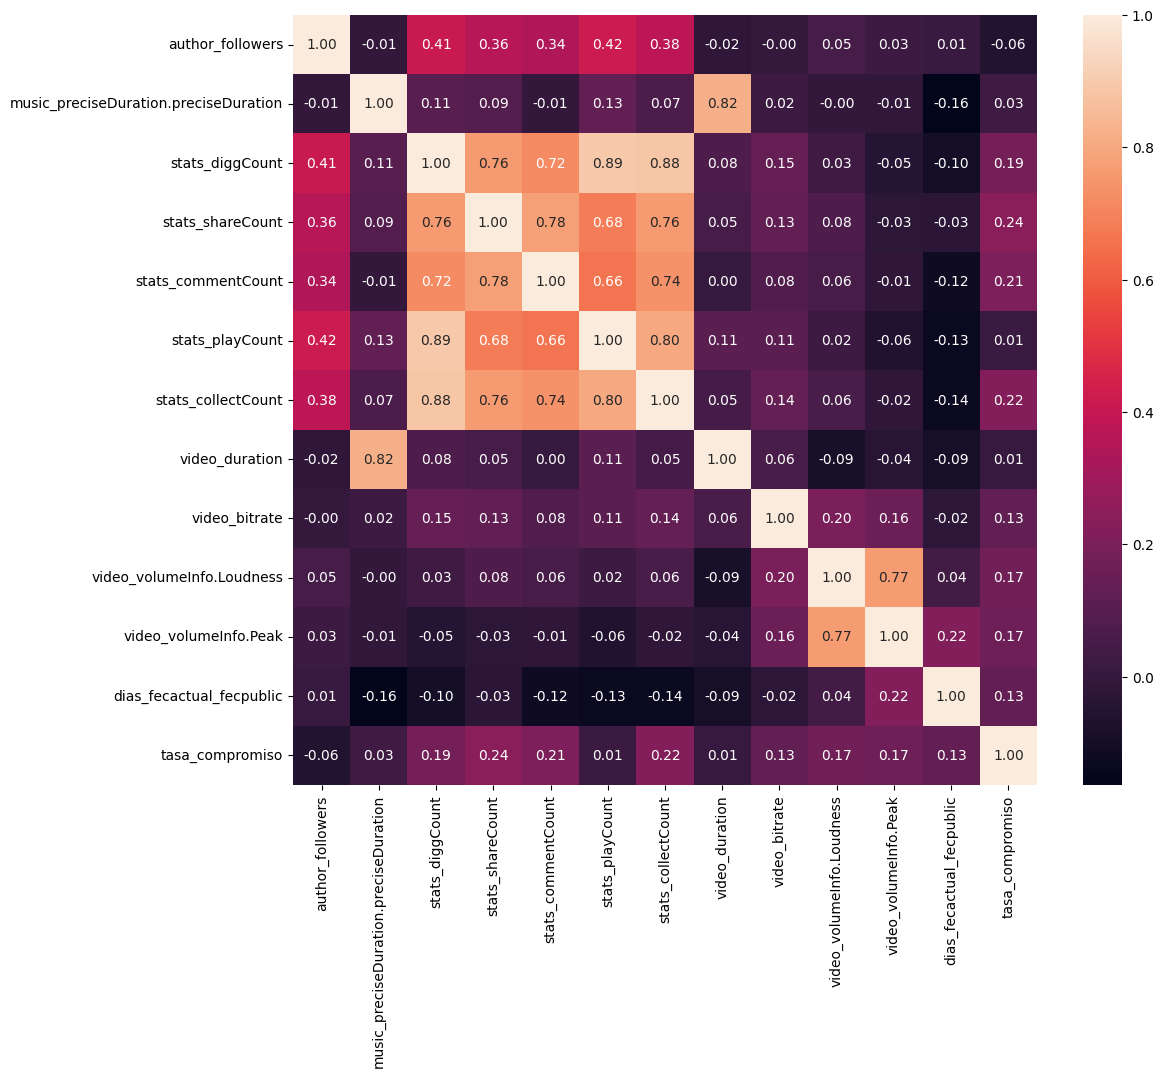

In [ ]:
# mover la columna price al inicio en el dataframe auto_df
# para que los valores de correlacion se vean al inicio

cols = df_mancity_def.columns.tolist()
cols.insert(0, cols.pop(cols.index("stats_playCount")))
auto_df = df_mancity_def.reindex(columns= cols)

automobile_corr = df_mancity_def.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(automobile_corr, annot=True, fmt=".2f");


Visualización variables categóricas:

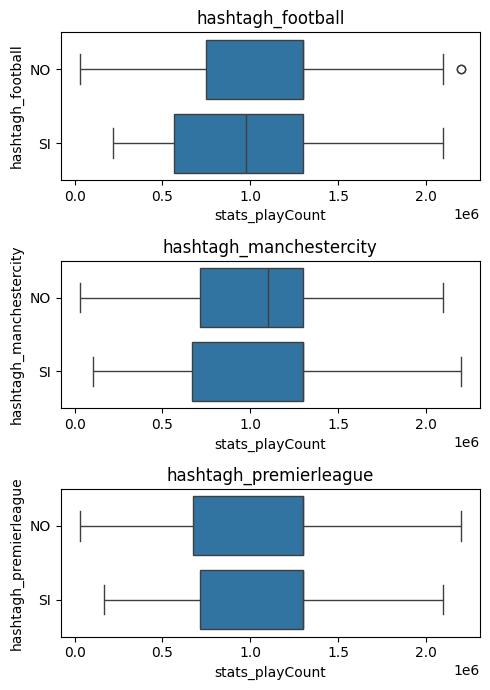

In [ ]:
# el plot seran 5 filas y 3 columnas

fig, axes = plt.subplots(3, 1, figsize=(5, 7))
axes = axes.flatten()
for i, col in enumerate(cols_categoricas):
    sns.boxplot(data=auto_df,
                x="stats_playCount", y=col,
                ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


Creacion de pipelines de transformacion, la codificacion es:

In [ ]:
cols_numericas = ['author_followers', 'music_preciseDuration.preciseDuration',
       'stats_diggCount', 'stats_shareCount', 'stats_commentCount', 'stats_collectCount', 'video_duration',
       'video_bitrate', 'video_volumeInfo.Loudness', 'video_volumeInfo.Peak',
       'dias_fecactual_fecpublic', 'tasa_compromiso']

cols_categoricas = ['hashtagh_football', 'hashtagh_manchestercity', 'hashtagh_premierleague']

In [ ]:
numeric_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

categorical_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numericas', numeric_pipe, cols_numericas),
        ('categoricas', categorical_pipe, cols_categoricas)
        ])
preprocessor

ColumnTransformer(transformers=[('numericas',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['author_followers',
                                  'music_preciseDuration.preciseDuration',
                                  'stats_diggCount', 'stats_shareCount',
                                  'stats_commentCount', 'stats_collectCount',
                                  'video_duration', 'video_bitrate',
                                  'video_volumeInfo.Loudness',
                                  'video_volumeInfo.Peak',
                                  'dias_fecactual_fecpublic',
                                  'tasa_compromiso']),
                                ('categoricas',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['hashtagh_football',
                                  'hashtagh_manchestercity',
                                  'hashtagh_premierleague'])])

### Modelo de regresión

Dividir el dataset en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_features = auto_df.drop('stats_playCount', axis='columns')
Y_target = auto_df['stats_playCount']

x_train, x_test, y_train, y_test = train_test_split(X_features,
                                                    Y_target,
                                                    test_size=0.3,
                                                    random_state=42)


#### Regresión modelo simple

Cross Validation modelo simple

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

result_dict = {}

FEATURES = list(x_train.columns)
FEATURES

['author_followers',
 'music_preciseDuration.preciseDuration',
 'stats_diggCount',
 'stats_shareCount',
 'stats_commentCount',
 'stats_collectCount',
 'video_duration',
 'video_bitrate',
 'video_volumeInfo.Loudness',
 'video_volumeInfo.Peak',
 'dias_fecactual_fecpublic',
 'tasa_compromiso',
 'hashtagh_football',
 'hashtagh_manchestercity',
 'hashtagh_premierleague']

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def entrenar_modelo(modelo,
                    preprocessor: ColumnTransformer,
                    x_data: pd.DataFrame,
                    y_data: pd.Series,
                    test_frac:float=0.3,
                  ):

    # dividir el dataset en entrenamiento y prueba
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                        random_state=42,
                                                        test_size=test_frac)
    # crear el pipeline con el preprocesador y el modelo
    regressor_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                                     ("model", modelo)])

    # entrenar el pipeline de regresion
    model = regressor_pipe.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)

    # predecir con el pipeline de regresion
    y_pred = model.predict(x_test)

    rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False)

    train_score = mean_absolute_error(y_train, y_pred_train)
    test_score = mean_absolute_error(y_test, y_pred)
    R=r2_score(y_test, y_pred)
    print("Entrenamiento_score (MSE) : " , train_score)
    print("Prueba_score (MSE) : ", test_score)
    print("RMSE : ", rmse)
    print("R2 : ", R)

    return {
            'Entrenamiento_score': train_score,
            'Prueba_score': test_score,
            'RMSE': rmse,
            'R2':R
           }

Función para comparar resultados:

In [ ]:
# Funcion para comparar los resultados de los modelos
#se van a almacenar en un diccionario
def compare_results():
    for key in result_dict:
        print('Regresion: ', key)
        print('Entrenamiento score: ', result_dict[key]['Entrenamiento_score'])
        print('Prueba score: ', result_dict[key]['Prueba_score'])
        print('RMSE: ', result_dict[key]['RMSE'])
        print('R2: ', result_dict[key]['R2'])
        print()




Se crea un modelo simple:

In [ ]:
result_dict['Dummy Regressor'] = entrenar_modelo(DummyRegressor(strategy='median'),
                                                 preprocessor,
                                                 x_train,
                                                 y_train)


Entrenamiento_score (MSE) :  402311.6883116883
Prueba_score (MSE) :  413977.6119402985
RMSE :  501991.4153098399
R2 :  -0.0030792991077710496


Regresión lineal:

In [ ]:
result_dict['Linear Regressor'] = entrenar_modelo(LinearRegression(),
                                                 preprocessor,
                                                 x_train,
                                                 y_train)


Entrenamiento_score (MSE) :  112210.87514247058
Prueba_score (MSE) :  174519.71825939862
RMSE :  264268.4194379649
R2 :  0.7220074086700785


Lasso:

In [ ]:
result_dict['Lasso'] = entrenar_modelo(Lasso(alpha=0.5),
                                       preprocessor,
                                       x_train,
                                       y_train)

Entrenamiento_score (MSE) :  112212.97563840197
Prueba_score (MSE) :  174511.01723142347
RMSE :  264262.9584139941
R2 :  0.7220188978107213


Ridge:

In [ ]:
result_dict['Ridge'] = entrenar_modelo(Ridge(alpha=0.5),
                                       preprocessor,
                                       x_train,
                                       y_train)


Entrenamiento_score (MSE) :  125022.10976651582
Prueba_score (MSE) :  167446.60591582753
RMSE :  263791.399737366
R2 :  0.7230100881463769


Elasticnet:

In [ ]:
result_dict['Elasticnet'] = entrenar_modelo(ElasticNet(alpha=1, l1_ratio=0.5,
                                                       max_iter= 100000,
                                                       warm_start= True),
                                            preprocessor,
                                            x_train,
                                            y_train)


Entrenamiento_score (MSE) :  127272.54243655792
Prueba_score (MSE) :  169230.37105498742
RMSE :  265037.8314970644
R2 :  0.7203863128011894


KNR:

In [ ]:
result_dict['KNR'] = entrenar_modelo(KNeighborsRegressor(n_neighbors=10),
                                     preprocessor,
                                     x_train,
                                     y_train)


Entrenamiento_score (MSE) :  249811.4935064935
Prueba_score (MSE) :  312931.3432835821
RMSE :  381929.13683976006
R2 :  0.4193582362207784


Decision Tree:

In [ ]:
result_dict['Decision Tree'] = entrenar_modelo(DecisionTreeRegressor(max_depth=2),
                                               preprocessor,
                                               x_train,
                                               y_train)


Entrenamiento_score (MSE) :  119342.36870022348
Prueba_score (MSE) :  172828.1176304839
RMSE :  253098.3173039654
R2 :  0.7450111425347135


In [ ]:
compare_results()

Regresion:  Dummy Regressor
Entrenamiento score:  402311.6883116883
Prueba score:  413977.6119402985
RMSE:  501991.4153098399
R2:  -0.0030792991077710496

Regresion:  Linear Regressor
Entrenamiento score:  112210.87514247058
Prueba score:  174519.71825939862
RMSE:  264268.4194379649
R2:  0.7220074086700785

Regresion:  Lasso
Entrenamiento score:  112212.97563840197
Prueba score:  174511.01723142347
RMSE:  264262.9584139941
R2:  0.7220188978107213

Regresion:  Ridge
Entrenamiento score:  125022.10976651582
Prueba score:  167446.60591582753
RMSE:  263791.399737366
R2:  0.7230100881463769

Regresion:  Elasticnet
Entrenamiento score:  127272.54243655792
Prueba score:  169230.37105498742
RMSE:  265037.8314970644
R2:  0.7203863128011894

Regresion:  KNR
Entrenamiento score:  249811.4935064935
Prueba score:  312931.3432835821
RMSE:  381929.13683976006
R2:  0.4193582362207784

Regresion:  Decision Tree
Entrenamiento score:  119342.36870022348
Prueba score:  172828.1176304839
RMSE:  253098.3173

In [ ]:
# Crear un diccionario solo con los resultados de prueba de cada modelo
nombre_modelos = result_dict.keys()
resultados_train = {} # crear diccionario vacio
resultados_test = {} # crear diccionario vacio
for nombre in nombre_modelos:
    resultados_train[nombre] = result_dict[nombre]['Entrenamiento_score']
    resultados_test[nombre] = result_dict[nombre]['Prueba_score']

df_comparacion = pd.DataFrame([resultados_train, resultados_test],
                              index=['train', 'test'])


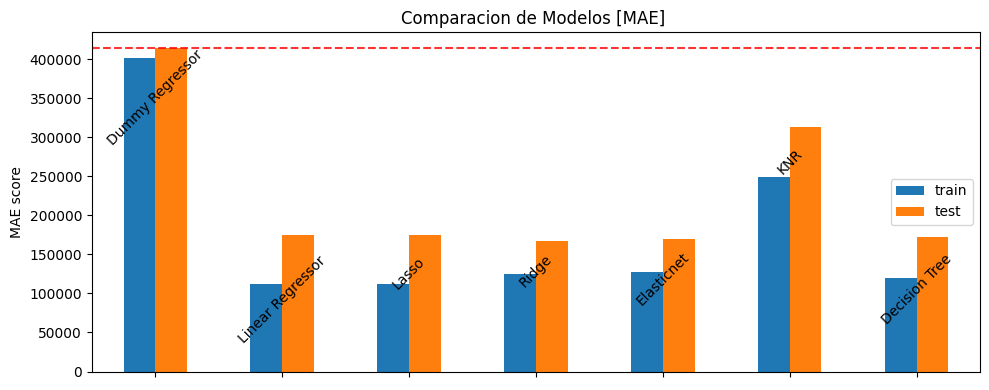

In [ ]:
# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 4))
df_comparacion.T.plot(kind='bar', ax=ax)

# Adjust the layout
ax.set_ylabel('MAE score')
ax.set_title('Comparacion de Modelos [MAE] ')

# Set the x-tick labels inside the bars and rotate by 90 degrees
ax.set_xticks(range(len(df_comparacion.columns)))
ax.set_xticklabels([])

# Draw the x-tick labels inside the bars rotated by 90 degrees
for i, label in enumerate(df_comparacion.columns):
    bar_center = (df_comparacion.loc['train', label] +
                  df_comparacion.loc['test', label]) / 2
    ax.text(i, bar_center, label, ha='center',
            va='center_baseline', rotation=45)

#plot line at DUmmerRegressor result
ax.axhline(df_comparacion['Dummy Regressor']['test'],
           color='red',
           linestyle='--',
           alpha=0.8)

plt.tight_layout()


### Cross Validation - Seleccion de Modelos
Analizar la varianza de los resultados para obtener los que tengan mejor resultado.

In [ ]:
# lista para almacenar cada uno los modelos seleccionados para el cross validation
models = []

# Alamcenando los modelos como una tupla (nombre, modelo)
models.append(('LinearRegression',LinearRegression()))
models.append(('Lasso',Lasso(alpha=0.5)))
models.append(('Elastic_net',ElasticNet(alpha=1,
                                        l1_ratio=0.5,
                                        max_iter= 100000,
                                        warm_start= True)))
models.append(('Kneighbors',KNeighborsRegressor(n_neighbors=10)))
models.append(('Decision_tree',DecisionTreeRegressor(max_depth=2)))
#models.append(('SVR',SVR(kernel='linear', epsilon=0.05, C=0.3)))


In [ ]:
# Grabar los resultados de cada modelo
from sklearn import model_selection

#Semilla para obtener los mismos resultados de pruebas
seed = 2
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    # Kfold cross validation for model selection
    kfold = model_selection.KFold(n_splits=10)
    model_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", model)])
    #X train , y train
    cv_results = model_selection.cross_val_score(model_pipe, x_train, y_train,
                                                 cv=kfold, scoring=scoring)
    # la metrica neg_mean_absolute_error se debe convertir en positiva
    cv_results = np.abs(cv_results)

    results.append(cv_results)
    names.append(name)
    msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
    print(msg)

(LinearRegression, 136813.48498261409, 25764.23126432799
(Lasso, 136812.41274743705, 25767.412494661574
(Elastic_net, 142832.13097828807, 32089.66885327979
(Kneighbors, 267773.1640316205, 39667.61852397052
(Decision_tree, 151640.4600263412, 22265.294757335567


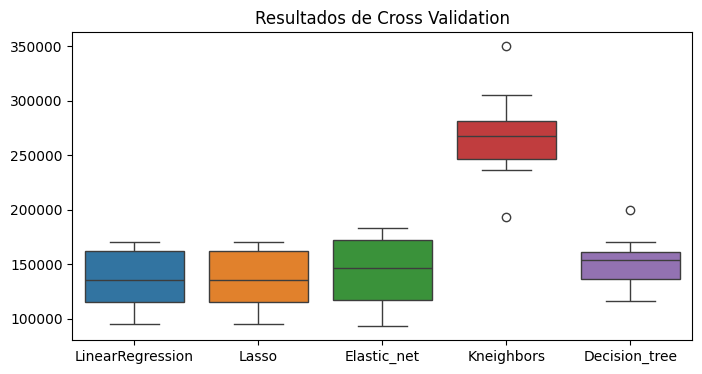

In [ ]:
plt.figure(figsize = (8,4))
result_df = pd.DataFrame(results, index=names).T
sns.boxplot(data=result_df)
plt.title("Resultados de Cross Validation")
plt.show()

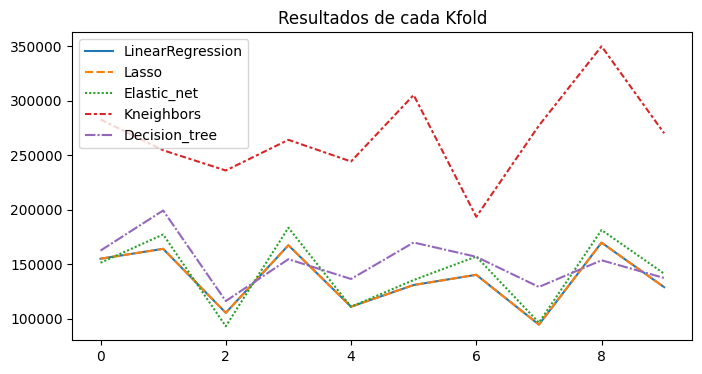

In [ ]:
plt.figure(figsize = (8,4))
sns.lineplot(data=result_df)
plt.title("Resultados de cada Kfold")
plt.show()


Comparación estadística de modelos

In [ ]:
from scipy.stats import f_oneway

model1 = result_df['LinearRegression']
model2 = result_df['Lasso']
model3 = result_df['Elastic_net']
model4 = result_df['Kneighbors']
model5 = result_df['Decision_tree']
#model6 = result_df['SVR']

#statistic, p_value = f_oneway(model1, model2, model3, model4, model5, model6)


statistic, p_value = f_oneway(model1, model2, model3, model4, model5)


print(f'Statistic: {statistic}')
print(f'p_value: {p_value}')

alpha = 0.05  # nivel de significancia

if p_value < alpha:
    print("Existe una diferencia estadísticamente "
          "significativa en los resultados de"
          " cross-validation de los modelos.")
else:
    print("No Existe una diferencia estadísticamente "
          "significativa en los resultados de "
          "cross-validation de los modelos.")


Statistic: 32.523286399557556
p_value: 9.378316703514705e-13
Existe una diferencia estadísticamente significativa en los resultados de cross-validation de los modelos.


### Hyper Parameter Tunning
Optimizacion de hiperparametros, Se seleccionan los mejores modelos que tengan diferentes formas de funcionamiento.

In [ ]:
from sklearn.model_selection import GridSearchCV

Lasso regression:

In [ ]:
parameters = {'model__alpha': [0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]}

lasso_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                             ("model", Lasso())])

grid_search = GridSearchCV(lasso_pipe, parameters, cv=5,
                           return_train_score=True,
                           scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train);


Resultados de hiperparametrización:

In [ ]:
# la medida neg_mean_absolute_error se debe convertir en positiva
print(f"Mejor resultado = {abs(grid_search.best_score_)}")
print(f"Mejor std = {grid_search.cv_results_['std_test_score'][grid_search.best_index_]}")
print(f"Mejor parametros = {grid_search.best_params_}")


Mejor resultado = 138402.39330667636
Mejor std = 18944.723278321308
Mejor parametros = {'model__alpha': 1.0}


In [ ]:
# Para ver todos los resultados del cross validation
# No es necesario, solo es informativo para ver como varia el modelo
for i in range(len(parameters['model__alpha'])):
    print('Parametros: ', grid_search.cv_results_['params'][i])
    print('Promedio Score Prueba: ', np.abs(grid_search
                                            .cv_results_['mean_test_score'][i]))
    print('Std Score Prueba: ', grid_search.cv_results_['std_test_score'][i])

    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])


Parametros:  {'model__alpha': 0.2}
Promedio Score Prueba:  138402.96973269765
Std Score Prueba:  18942.223186265033
Rank:  7
Parametros:  {'model__alpha': 0.4}
Promedio Score Prueba:  138402.8256278683
Std Score Prueba:  18942.84814923049
Rank:  6
Parametros:  {'model__alpha': 0.6}
Promedio Score Prueba:  138402.68152342914
Std Score Prueba:  18943.473150666898
Rank:  5
Parametros:  {'model__alpha': 0.7}
Promedio Score Prueba:  138402.6094712385
Std Score Prueba:  18943.78566596685
Rank:  4
Parametros:  {'model__alpha': 0.8}
Promedio Score Prueba:  138402.5374188591
Std Score Prueba:  18944.098190709694
Rank:  3
Parametros:  {'model__alpha': 0.9}
Promedio Score Prueba:  138402.46535897016
Std Score Prueba:  18944.410734385063
Rank:  2
Parametros:  {'model__alpha': 1.0}
Promedio Score Prueba:  138402.39330667636
Std Score Prueba:  18944.723278321308
Rank:  1


In [ ]:
lasso_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                             ("model", Lasso(alpha=grid_search
                                             .best_params_['model__alpha']))])

lasso_model = lasso_pipe.fit(x_train, y_train)


In [ ]:
y_pred = lasso_model.predict(x_test)
y_pred_train = lasso_model.predict(x_train)

print('Entrenamiento score: ', mean_absolute_error(y_train, y_pred_train))
print('Prueba score: ', mean_absolute_error(y_test, y_pred))
print('R2 train: ', r2_score(y_train, y_pred_train))
print('R2 test: ', r2_score(y_test, y_pred))


Entrenamiento score:  127303.93693788451
Prueba score:  143477.4407180374
R2 train:  0.8228906261609505
R2 test:  0.8247251145896743


KNeighbors regression

In [ ]:
parameters = {'model__n_neighbors': [10, 12, 14, 18, 20, 25, 30, 35, 50]}

knn_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", KNeighborsRegressor())])

grid_search = GridSearchCV(knn_pipe, parameters, cv=5,
                           return_train_score=True,
                           scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train);


In [ ]:
print(f"Mejor resultado = {abs(grid_search.best_score_)}")
print(f"Mejor std = {grid_search.cv_results_['std_test_score'][grid_search.best_index_]}")
print(f"Mejor parametros = {grid_search.best_params_}")


Mejor resultado = 286403.43333333335
Mejor std = 25515.22710702939
Mejor parametros = {'model__n_neighbors': 10}


In [ ]:
knn_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", KNeighborsRegressor(n_neighbors=grid_search.
                                                         best_params_['model__n_neighbors']))])

kneighbors_model = knn_pipe.fit(x_train, y_train)


In [ ]:
y_pred = kneighbors_model.predict(x_test)
y_pred_train = kneighbors_model.predict(x_train)

print('Entrenamiento score: ', mean_absolute_error(y_train, y_pred_train))
print('Prueba score: ', mean_absolute_error(y_test, y_pred))
print('R2 train: ', r2_score(y_train, y_pred_train))
print('R2 test: ', r2_score(y_test, y_pred))


Entrenamiento score:  230481.71945701356
Prueba score:  279748.4375
R2 train:  0.6353439770732764
R2 test:  0.4430232323462985


Decision Tree:

In [ ]:
parameters = {'model__max_depth': [4, 5, 7, 9, 10],
              'model__max_features': [5, 10, 15, 20,30],
              'model__criterion': ['squared_error',
                                   'absolute_error',
                                   'poisson',
                                   'friedman_mse'],
              }

dt_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", DecisionTreeRegressor())])

grid_search = GridSearchCV(dt_pipe, parameters, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)
grid_search.fit(x_train, y_train);


In [ ]:
print(f"Mejor resultado = {abs(grid_search.best_score_)}")
print(f"Mejor std = {grid_search.cv_results_['std_test_score'][grid_search.best_index_]}")
print(f"Mejor parametros = {grid_search.best_params_}")


Mejor resultado = 117872.21717171717
Mejor std = 15826.05697371012
Mejor parametros = {'model__criterion': 'absolute_error', 'model__max_depth': 4, 'model__max_features': 20}


In [ ]:
model = DecisionTreeRegressor(max_depth=grid_search.best_params_['model__max_depth'],
                              criterion=grid_search.best_params_['model__criterion'])

dt_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model",model)])
decision_tree_model = dt_pipe.fit(x_train, y_train)


In [ ]:
y_pred = decision_tree_model.predict(x_test)
y_pred_train = decision_tree_model.predict(x_train)

print('Entrenamiento score: ', mean_absolute_error(y_train, y_pred_train))
print('Prueba score: ', mean_absolute_error(y_test, y_pred))
print('R2 train: ', r2_score(y_train, y_pred_train))
print('R2 test: ', r2_score(y_test, y_pred))


Entrenamiento score:  78385.97285067874
Prueba score:  124524.47916666667
R2 train:  0.8818879618607769
R2 test:  0.7954066168938086


Esta diferencia entre entrenamiento y prueba se debe a que el modelo esta sobreajustado (overfitt), es decir, esta memorizando los datos de entrenamiento y no generaliza bien para los datos de prueba.

Este fenomeno se puede reducir con la regularizacion, en este caso con el parametro min_samples_leaf que indica el numero minimo de muestras que debe tener una hoja para que el modelo no siga creciendo. pero como se tienen pocos datos, no se va continuar con este modelo.

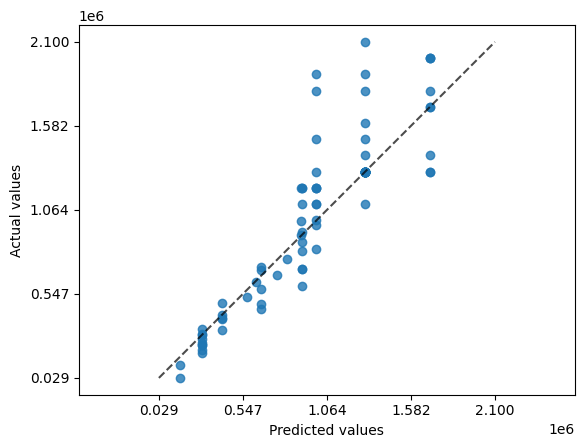

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred,
                                        kind="actual_vs_predicted");


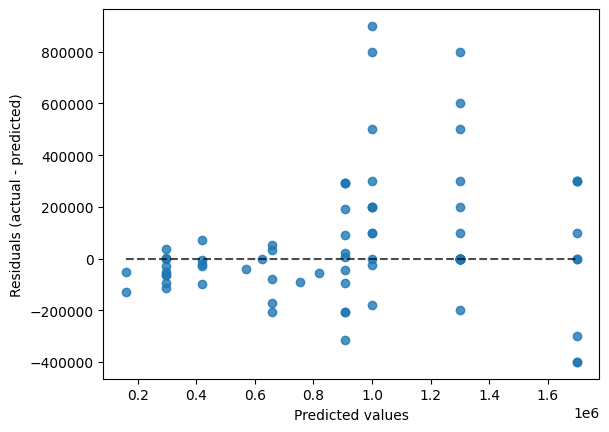

In [ ]:
PredictionErrorDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred,
                                        kind="residual_vs_predicted");


### Interpretación del modelo

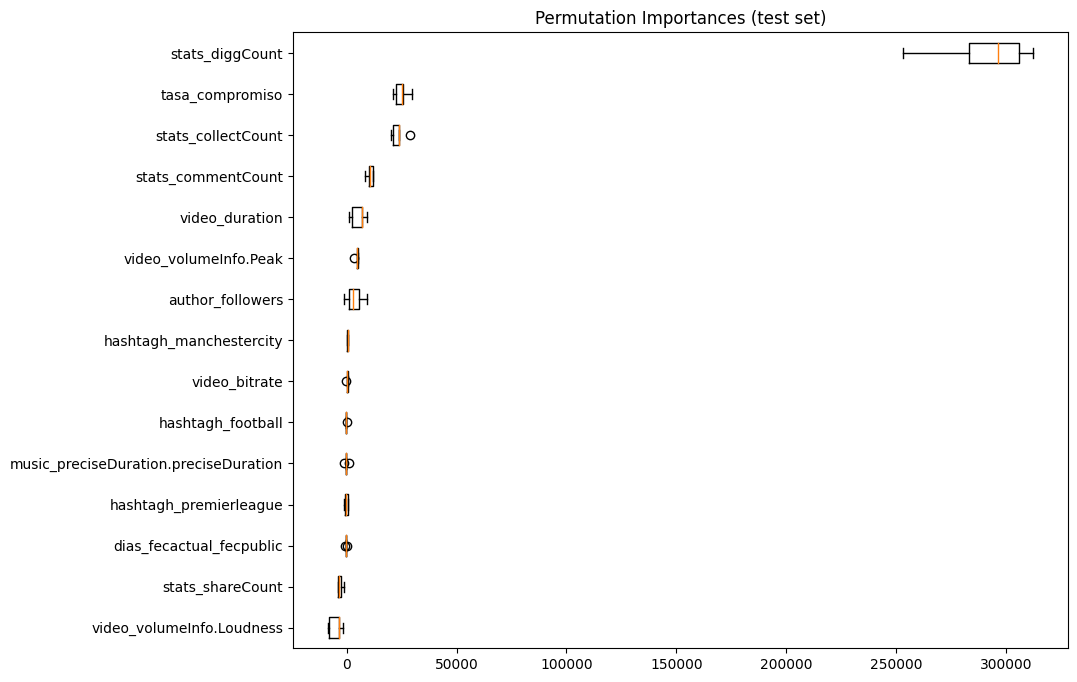

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(lasso_pipe, x_test, y_test,
                              n_repeats = 5,
                              scoring= "neg_mean_absolute_error",
                              n_jobs=-1, random_state=42)
fig= plt.figure(figsize=(10,8))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx])
plt.title("Permutation Importances (test set)");

En base a estos resultados se pueden reducir el numero de variables y obtener un modelo mas simple con mas o menos el mismo desempeño.

Viendo las graficas solo tomare las 8 variables mas importantes.

In [ ]:
#los valores estan en orden ascendente, entonces se deben tomar los ultimos 8
# se puede comprobar al comparar con el grafico de barras
cols_seleccionadas = x_test.columns[perm_sorted_idx][-7:].tolist()
cols_seleccionadas

['author_followers',
 'video_volumeInfo.Peak',
 'video_duration',
 'stats_commentCount',
 'stats_collectCount',
 'tasa_compromiso',
 'stats_diggCount']

Modelo con menos variables:

In [ ]:
x_train = x_train[cols_seleccionadas]
x_test = x_test[cols_seleccionadas]
x_train.head()

,author_followers,video_volumeInfo.Peak,video_duration,stats_commentCount,stats_collectCount,tasa_compromiso,stats_diggCount
180,24126897,0.56234,18,81,797,0.111208,24400
303,24128036,0.76736,13,257,1013,0.079486,28200
266,24126571,0.18197,18,105,1099,0.100828,37700
157,24126537,0.38459,15,142,899,0.101842,29900
66,24128951,0.50119,9,304,2354,0.080657,68400


In [ ]:
cols_seleccionadas

['author_followers',
 'video_volumeInfo.Peak',
 'video_duration',
 'stats_commentCount',
 'stats_collectCount',
 'tasa_compromiso',
 'stats_diggCount']

En este caso, todas las variables son numéricas:

In [ ]:
cols_seleccionadas_num=['author_followers',
 'video_volumeInfo.Peak',
 'video_duration',
 'stats_commentCount',
 'stats_collectCount',
 'tasa_compromiso',
 'stats_diggCount']

#cols_seleccionadas_cat=['hashtagh_manchestercity']

numeric_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

#categorical_pipe = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numericas', numeric_pipe, cols_seleccionadas_num)
        #('categoricas', categorical_pipe, cols_seleccionadas_cat)
        ])


model = Lasso(alpha=1.0)

lasso_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])
lasso_model = lasso_pipe.fit(x_train, y_train)


In [ ]:
y_pred = lasso_model.predict(x_test)
y_pred_train = lasso_model.predict(x_train)

print('Entrenamiento score: ', mean_absolute_error(y_train, y_pred_train))
print('Prueba score: ', mean_absolute_error(y_test, y_pred))
print('R2 train: ', r2_score(y_train, y_pred_train))
print('R2 test: ', r2_score(y_test, y_pred))


Entrenamiento score:  127237.53631202182
Prueba score:  137017.19896425432
R2 train:  0.8187228020187037
R2 test:  0.8363386111025356


### Procesamiento y Modelo final con scikit-learn

In [ ]:
cols_seleccionadas

['author_followers',
 'video_volumeInfo.Peak',
 'video_duration',
 'stats_commentCount',
 'stats_collectCount',
 'tasa_compromiso',
 'stats_diggCount']

In [ ]:
columnas=['author_followers',
 'video_volumeInfo.Peak',
 'video_duration',
 'stats_commentCount',
 'stats_collectCount',
 'tasa_compromiso',
 'stats_diggCount','stats_playCount']

auto_df=df_mancity_def[columnas]


In [ ]:
X = auto_df.drop('stats_playCount', axis='columns')
y = auto_df['stats_playCount']

In [ ]:
lasso_model = lasso_pipe.fit(X, y)

In [ ]:
from joblib import dump# libreria de serializacion

# grabar el modelo en un archivo
dump(lasso_model, 'lasso_model.joblib')
import pandas as pd
from joblib import load

modelo = load('lasso_model.joblib')
modelo



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numericas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['author_followers',
                                                   'video_volumeInfo.Peak',
                                                   'video_duration',
                                                   'stats_commentCount',
                                                   'stats_collectCount',
                                                   'tasa_compromiso',
                                                   'stats_diggCount'])])),
                ('model', Lasso())])

In [ ]:
# tomar dos datos de entrada para realizar la prediccion, eliminando la columna precio
datos_prueba = X. sample(50)
datos_prueba


,author_followers,video_volumeInfo.Peak,video_duration,stats_commentCount,stats_collectCount,tasa_compromiso,stats_diggCount
241,24128010,1.00000,10,486,4335,0.149614,110600
200,24129278,1.00000,7,500,4082,0.084290,123600
8,24126635,0.35892,34,844,4082,0.111158,198400
25,24126953,0.50119,23,383,5288,0.067619,121000
272,24127314,0.36308,25,197,1585,0.097688,54500
276,24129194,1.00000,6,500,4082,0.059125,123600
300,24126980,0.41210,7,500,4082,0.096653,123600
214,24126656,0.28840,14,104,1548,0.082323,30100
19,24126722,0.70795,8,316,2394,0.094403,53100
10,24129569,0.56885,13,710,4967,0.062372,198300


In [ ]:
y.shape

(317,)

In [ ]:
# resultados de predicion con el modelo

#modelo.predict(datos_prueba)
mod_pred=modelo.predict(X)
mod_pred

array([1312721.64630967,  516268.94601178,  448264.09225911,
       1157596.81165892, 1669673.27308112, 1658342.28544927,
       1304228.24423039, 1342884.46341264, 1856335.02472591,
       1247891.55341488, 2031681.95879161, 1369405.62952691,
       1471600.43804657, 1195222.50456291,  907715.61017698,
        642683.62754309, 1421747.50634927, 1318846.07858837,
        778157.88672519,  588097.33024514, 1034620.68364078,
       1250733.51617533,  972043.8724792 , 1304013.90211326,
       1411725.5558989 , 1348071.10712385, 1806581.29105127,
       1553323.83601105, 1954533.24276435,  845185.10423756,
       1335586.8973152 , 1394146.68917716, 1287342.42294329,
       1343335.3974337 ,  440679.54528153,  906959.6208775 ,
        598280.11822724, 1301181.49633276, 1052202.53689152,
       1279965.63741249,  369381.56858045, 1040647.75678515,
       1933271.87963212,  826964.69687939,  992538.92953616,
       1031777.95979571, 1279833.92460519,  763455.52379775,
        699475.03356284,

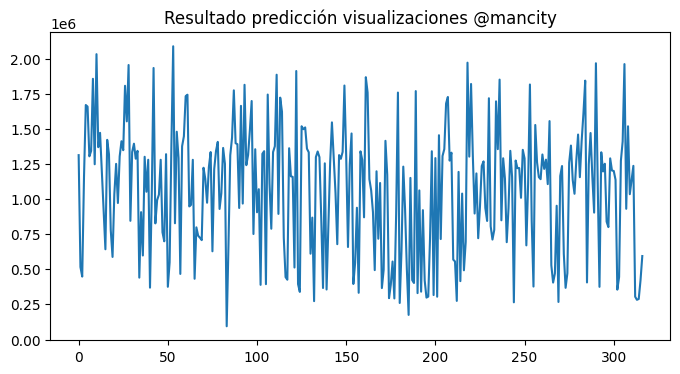

In [ ]:
plt.figure(figsize = (8,4))
sns.lineplot(data=modelo.predict(X))
plt.title("Resultado predicción visualizaciones @mancity")
plt.show()

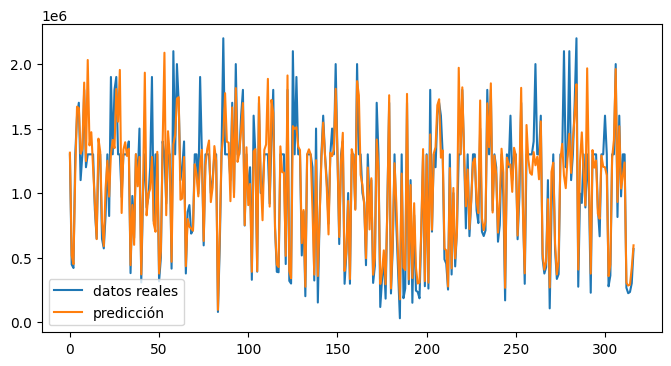

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(y,label='datos reales')
plt.plot(modelo.predict(X), label='predicción')
plt.legend()
plt.show()